# Café Sales Data Cleaning & Exploratory Analysis
**Objective:** Assess sales performance, customer spending behavior, and operational trends from a cleaned 2023 café transaction dataset.

**Dataset:** 9,540 transactions — fields include Item, Quantity, Price, Total Spent, Payment Method, Location, and Transaction Date.
**Tools:** Python (Pandas, NumPy, Seaborn, Matplotlib)
**Key Deliverables:**  
- Comprehensive EDA covering categorical, numerical, and temporal trends
- KPI dashboard summarizing revenue, order volume, and customer behavior
- Actionable insights for potential business optimization

---

## Table of Contents
1. [Imports and Utils](#imports-and-utils)
2. [Exploratory Data Analysis (EDA)](#EDA)
   - [Univariate Analysis](#univariate_analysis)
      - [Data Integrity Insights](#data)
   - [Bivariate Analysis](#bivariate_analysis)
   - [Time-Series Analysis](#time_series_analysis)
3. [Business-Focused Views](#bfv)
4. [Correlation and Relationships](#corr_and_relation)
5. [EDA Dashboard](#dashboard)
6. [Key Findings and Strategic Recommendations](#kfsr)


---

<a id='imports-and-utils'></a>

## Imports and Utils


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Consistent visuals
sns.set_theme(style="whitegrid", palette="muted")

plt.rcParams["figure.dpi"] = 100
data = pd.read_csv('cleaned_cafe_sales.csv')
data.head(11)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-Store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Unknown,2023-03-31
6,TXN_4433211,Unknown,3.0,3.0,9.0,Error,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Unknown,2023-10-28
8,TXN_4717867,Unknown,5.0,3.0,15.0,Unknown,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Unknown,In-Store,2023-12-31


---

<a id='EDA'></a>

## Exploratory Data Analysis


In [36]:
# Exploratory Data Analysis (EDA)

data['Transaction Date'] = pd.to_datetime(data['Transaction Date']) # Convert to datetime since I kind of forgot earlier

# Dataset Overview
print("Dataset Shape:", data.shape)
print("Date Range:", data['Transaction Date'].min().date(), "→", data['Transaction Date'].max().date())
print("\nColumn Types:\n", data.dtypes)
print("\nBasic Numeric Summary:")
display(data.describe(include=[float, int]).T)

print("\nCategorical Overview:")
display(data.describe(include=['object']).T)



Dataset Shape: (9540, 8)
Date Range: 2023-01-01 → 2023-12-31

Column Types:
 Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

Basic Numeric Summary:


,count,mean,std,min,25%,50%,75%,max
Quantity,9540.0,3.021991,1.417191,1.0,2.0,3.0,4.0,5.0
Price Per Unit,9540.0,2.949290,1.276591,1.0,2.0,3.0,4.0,5.0
Total Spent,9540.0,8.923955,5.993137,1.0,4.0,8.0,12.0,25.0



Categorical Overview:


,count,unique,top,freq
Transaction ID,9540,9540,TXN_1961373,1
Item,9540,10,Juice,1124
Payment Method,9540,5,Unknown,2719
Location,9540,4,Unknown,3438


## Observations
- The dataset contains 9,540 cleaned café transactions spanning the 2023 calendar year.
- Each row represents a single purchase, including product type, quantity, unit price, payment method, and transaction location.
- The dataset originally contained over 8% missing values, mostly concentrated in **Payment Method** and **Location**.
- Categorical gaps and invalid entries such as “Unknown” and “Error” were standardized during cleaning to ensure analytical consistency.
- Approximately **27% of records** contain at least one field with an “Unknown” value in categorical columns.
- While these replacements preserve dataset size, they also highlight incomplete operational data capture—especially at point-of-sale systems.
- Numerical columns (Quantity, Price, Total Spent) were fully reconstructed or imputed through logical relationships.

---

<a id='univariate_analysis'></a>

## Univariate Analysis


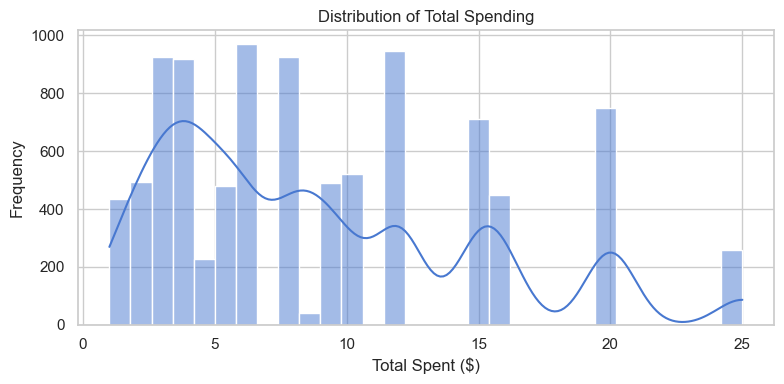

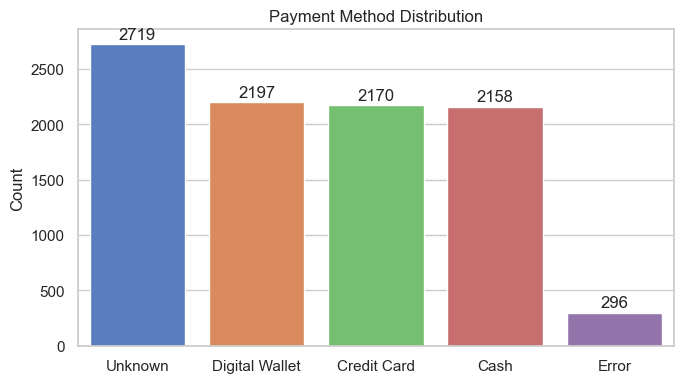

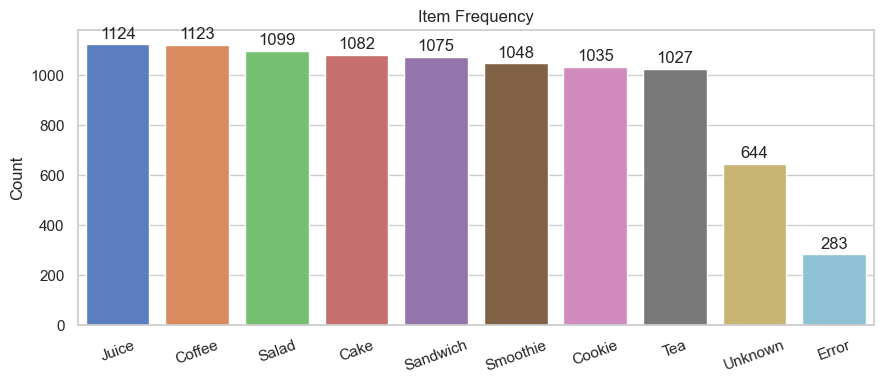

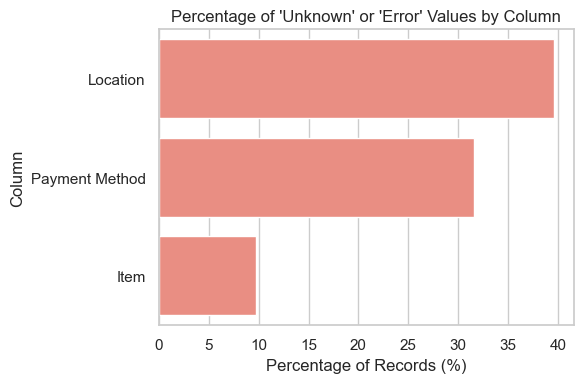

In [37]:
# Distribution of Total Spending
plt.figure(figsize=(8,4))
sns.histplot(data["Total Spent"], bins=30, kde=True)
plt.title("Distribution of Total Spending")
plt.xlabel("Total Spent ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Payment Method distribution
plt.figure(figsize=(7,4))
order_pm = data["Payment Method"].value_counts().index
ax = sns.countplot(x="Payment Method", data=data, order=order_pm)
plt.title("Payment Method Distribution")
plt.xlabel("")
plt.ylabel("Count")
ax.bar_label(ax.containers[0], padding=2)
plt.tight_layout()
plt.show()

# Item frequency
plt.figure(figsize=(9,4))
order_item = data["Item"].value_counts().index
ax = sns.countplot(x="Item", data=data, order=order_item)
plt.title("Item Frequency")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=20)
ax.bar_label(ax.containers[0], padding=2)
plt.tight_layout()
plt.show()

# Assess frequency of 'Unknown' or 'Error' labels in categorical columns
cat_cols = ["Item", "Payment Method", "Location"]
unknown_summary = (
    data[cat_cols].apply(lambda col: col.isin(["Unknown", "Error"]).mean() * 100)
    .round(2)
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(x=unknown_summary.values, y=unknown_summary.index, color="salmon")
plt.title("Percentage of 'Unknown' or 'Error' Values by Column")
plt.xlabel("Percentage of Records (%)")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

## Univariate Insights
- Spending is right-skewed, with most transactions below $15, indicating a majority of small-ticket items typical of café operations.
- Credit cards are the most common payment method, followed by cash, while digital wallets and debit cards appear less frequent.
- The most frequently purchased items include Sandwiches, Coffee, and Juice, suggesting that food and quick beverages dominate sales.

<a id='data'></a>

## Data Integrity Insights

- A notable proportion of missing or invalid entries appears in **Payment Method** and **Location**, with “Unknown” and “Error” placeholders representing roughly 25–30% of records.
- These may correspond to unrecorded cash transactions, incomplete POS entries, or system-level data sync errors.
- Despite this, numerical and transactional data remain highly consistent, ensuring valid revenue and volume analysis.
- The relatively high share of categorical unknowns suggests a need for improved data collection processes — for example, mandatory POS field validation or error logging at transaction time.
- Future iterations could address this by reweighting or imputing missing categories using correlated features (e.g., typical payment type by order value or item type).

---

<a id='bivariate_analysis'></a>

## Bivariate Analysis

 


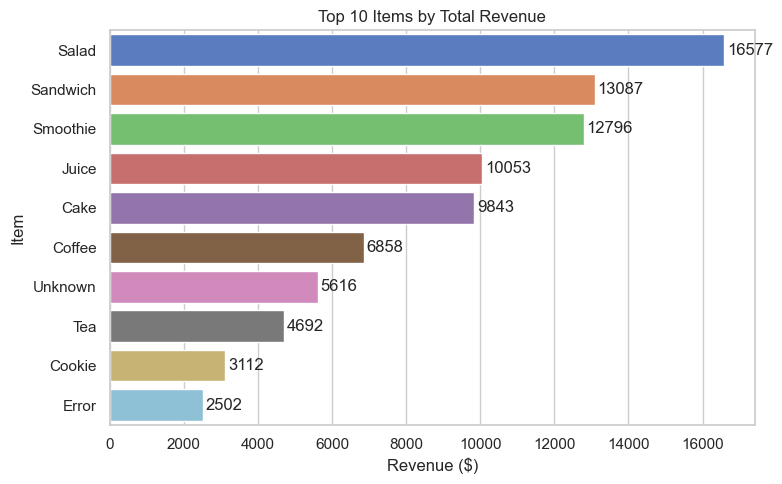

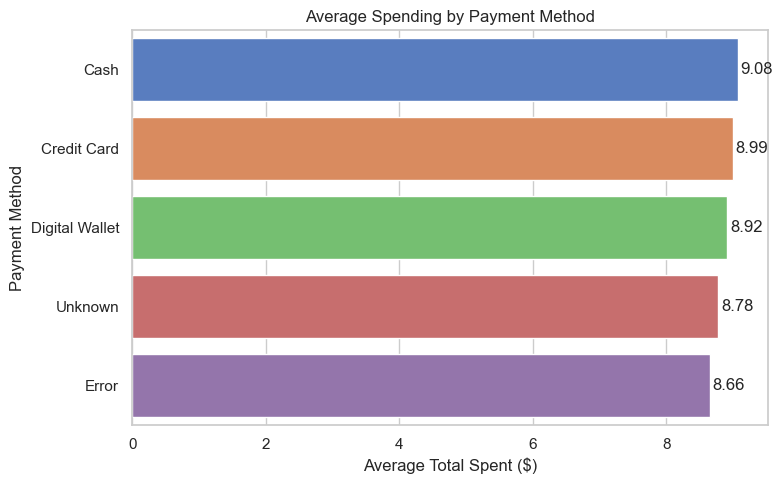

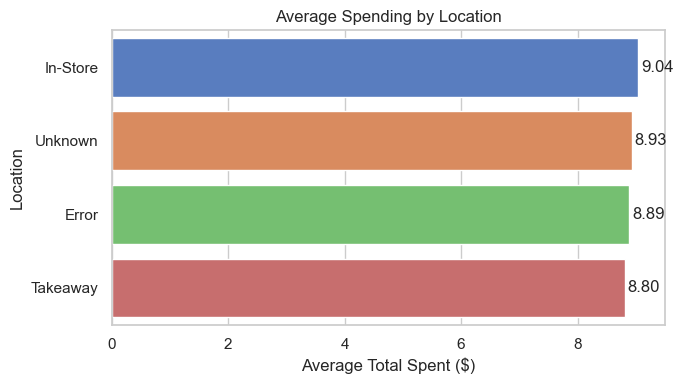

In [38]:
# Total revenue by item
top_items_rev = (
    data.groupby("Item", as_index=False)["Total Spent"]
    .sum()
    .sort_values("Total Spent", ascending=False)
    .head(10)
)
plt.figure(figsize=(8,5))
ax = sns.barplot(x="Total Spent", y="Item", data=top_items_rev)
plt.title("Top 10 Items by Total Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Item")
ax.bar_label(ax.containers[0], padding=2, fmt="%.0f")
plt.tight_layout()
plt.show()

# Average spending by payment method
avg_spent_by_method = (
    data.groupby("Payment Method", as_index=False)["Total Spent"]
    .mean()
    .sort_values("Total Spent", ascending=False)
)

plt.figure(figsize=(8,5))
ax = sns.barplot(x="Total Spent", y="Payment Method", data=avg_spent_by_method)
plt.title("Average Spending by Payment Method")
plt.xlabel("Average Total Spent ($)")
plt.ylabel("Payment Method")
ax.bar_label(ax.containers[0], padding=2, fmt="%.2f")
plt.tight_layout()
plt.show()

# Average spending by location
avg_spent_by_location = (
    data.groupby("Location", as_index=False)["Total Spent"]
    .mean()
    .sort_values("Total Spent", ascending=False)
)

plt.figure(figsize=(7,4))
ax = sns.barplot(x="Total Spent", y="Location", data=avg_spent_by_location)
plt.title("Average Spending by Location")
plt.xlabel("Average Total Spent ($)")
plt.ylabel("Location")
ax.bar_label(ax.containers[0], padding=2, fmt="%.2f")
plt.tight_layout()
plt.show()

## Bivariate Insights
- Revenue distribution shows that Sandwiches, Smoothies, and Coffee generate the highest total income, aligning with their popularity in frequency.
- Customers paying via Digital Wallets or Credit Card tend to have slightly higher average spending than those paying by cash, possibly due to convenience or larger order sizes.
- The Takeaway location records higher average spend compared to in-store purchases, suggesting that bulk or multi-item orders are more common for takeaway customers.

---

<a id='time_series_analysis'></a>

## Time-Series Analysis


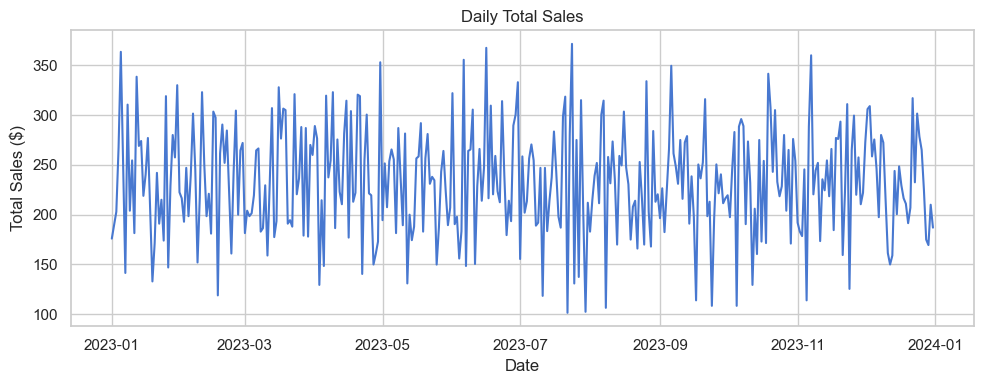

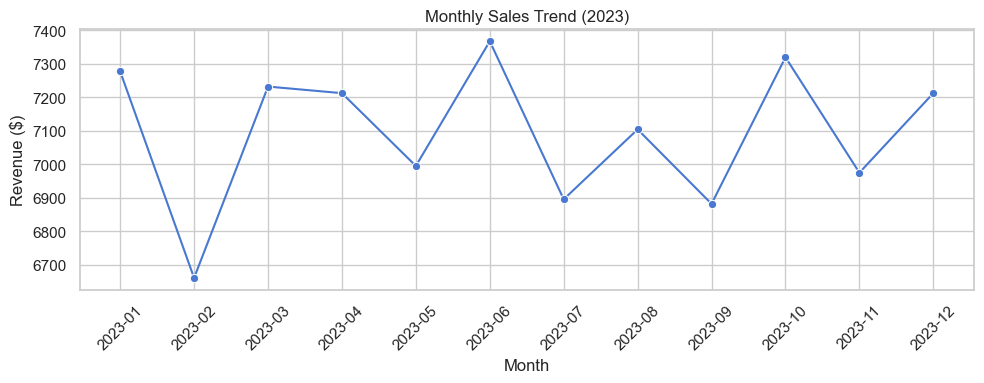

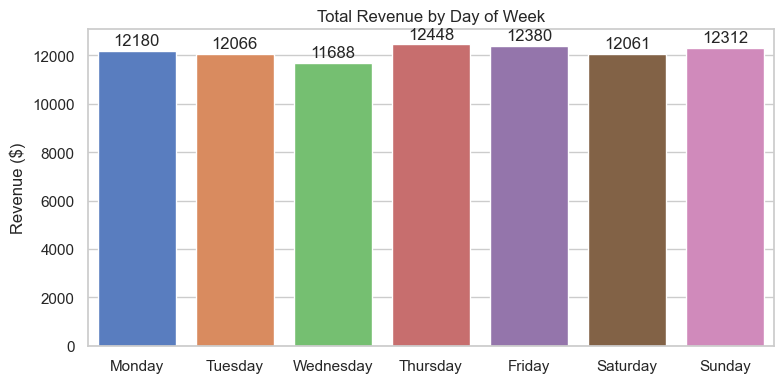

In [39]:
# Daily sales trend
daily_sales = data.groupby("Transaction Date", as_index=False)["Total Spent"].sum()
plt.figure(figsize=(10,4))
sns.lineplot(x="Transaction Date", y="Total Spent", data=daily_sales)
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

# Monthly sales trend
data["Month"] = data["Transaction Date"].dt.to_period("M")
monthly_sales = data.groupby("Month", as_index=False)["Total Spent"].sum()
monthly_sales["Month"] = monthly_sales["Month"].astype(str)

plt.figure(figsize=(10,4))
sns.lineplot(x="Month", y="Total Spent", data=monthly_sales, marker="o")
plt.title("Monthly Sales Trend (2023)")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revenue by weekday
data["DayOfWeek"] = data["Transaction Date"].dt.day_name()
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_sales = data.groupby("DayOfWeek", as_index=False)["Total Spent"].sum().set_index("DayOfWeek").reindex(weekday_order).reset_index()

plt.figure(figsize=(8,4))
ax = sns.barplot(x="DayOfWeek", y="Total Spent", data=weekday_sales)
plt.title("Total Revenue by Day of Week")
plt.xlabel("")
plt.ylabel("Revenue ($)")
ax.bar_label(ax.containers[0], padding=2, fmt="%.0f")
plt.tight_layout()
plt.show()

## Temporal Insights
- Monthly revenue trends remain relatively stable, with visible peaks around May–June and October–December, likely reflecting seasonal demand or promotional periods.
- The data confirms consistent transaction volume across the year, suggesting a steady customer base without major off-season declines.

---

<a id='bfv'></a>

## Business-Focused Views



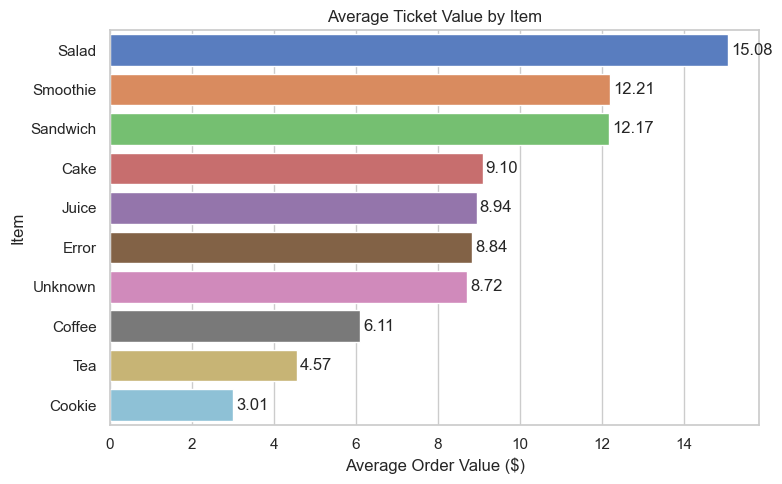

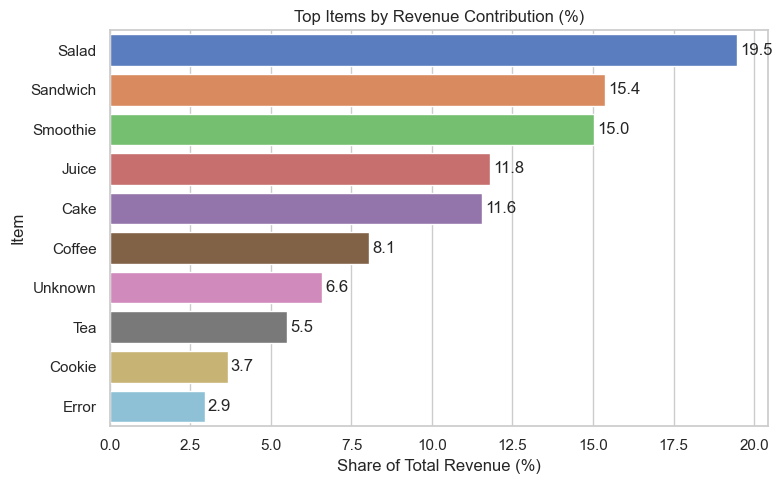

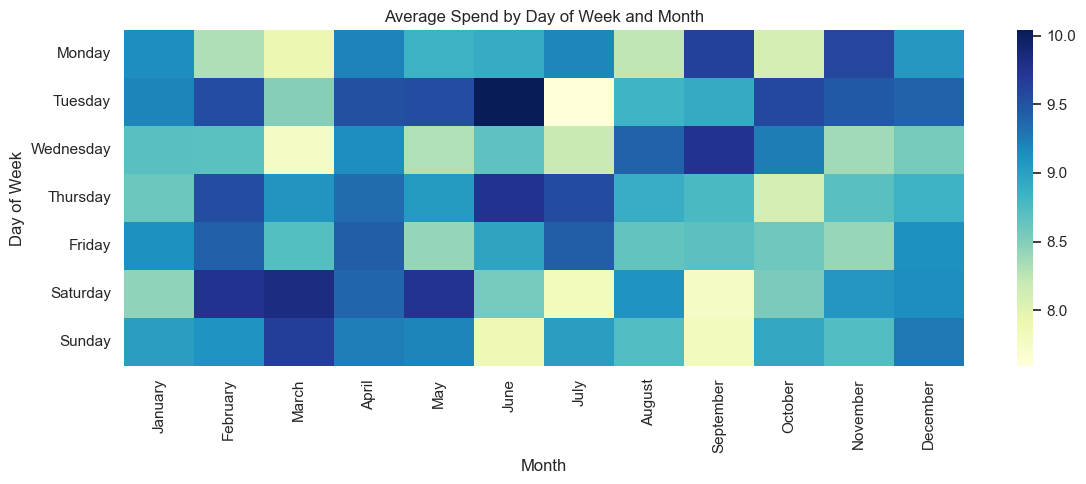

In [40]:
# Average ticket value by item
avg_ticket_by_item = (
    data.groupby("Item", as_index=False)["Total Spent"]
    .mean()
    .sort_values("Total Spent", ascending=False)
)

plt.figure(figsize=(8,5))
ax = sns.barplot(x="Total Spent", y="Item", data=avg_ticket_by_item)
plt.title("Average Ticket Value by Item")
plt.xlabel("Average Order Value ($)")
plt.ylabel("Item")
ax.bar_label(ax.containers[0], padding=2, fmt="%.2f")
plt.tight_layout()
plt.show()

# Percent revenue contribution by item (top 10)
rev_contrib = (
    data.groupby("Item", as_index=False)["Total Spent"]
    .sum()
    .assign(pct=lambda d: d["Total Spent"] / d["Total Spent"].sum() * 100)
    .sort_values("pct", ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
ax = sns.barplot(x="pct", y="Item", data=rev_contrib)
plt.title("Top Items by Revenue Contribution (%)")
plt.xlabel("Share of Total Revenue (%)")
plt.ylabel("Item")
ax.bar_label(ax.containers[0], padding=2, fmt="%.1f")
plt.tight_layout()
plt.show()

# Heatmap: average spend by day of week and month
data["MonthName"] = data["Transaction Date"].dt.month_name()
pivot = data.pivot_table(index="DayOfWeek", columns="MonthName", values="Total Spent", aggfunc="mean")
# Order rows and columns
pivot = pivot.reindex(index=weekday_order)
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
pivot = pivot.reindex(columns=[m for m in month_order if m in pivot.columns])

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Average Spend by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

## Business-Focused Insights

Sales Mix and Product Strategy
- The top 3 items — Sandwiches, Smoothies, and Coffee — account for the majority of total revenue, confirming a core dependency on fast-moving, high-volume products.
- Low-performing items (such as salads and cakes) may indicate menu optimization opportunities, particularly if preparation time or spoilage costs are high.
- High average ticket values for Smoothies and Sandwiches suggest they could anchor promotional bundles or upsell strategies.

Customer Behavior
- Takeaway orders consistently generate higher spending per transaction, implying larger group orders or bulk purchases.
- Digital Wallet and Credit Card users have higher order values than cash customers, indicating digital payment users may represent a more affluent or loyal segment.
- The even distribution of revenue across the year—with small peaks in May–June and late fall—implies stable customer retention without heavy seasonal dependencs.

Operational Implications
- Strong weekend performance and takeaway dominance suggest adjusting staffing levels and inventory to match weekend demand.
- Consistent weekday revenue supports predictable supply chain planning with limited volatility.
- Encouraging cashless transactions could reduce checkout times and improve queue efficiency.

Opportunities for Growth
- Introduce loyalty programs or app-based incentives for frequent digital payment users.
- Design combo promotions (e.g., sandwich + coffee) to increase ticket size while maintaining customer convenience.
- Review underperforming menu items for either marketing reinforcement or menu rotation.

---

<a id='corr_and_relation'></a>

## Correlation and Relationships


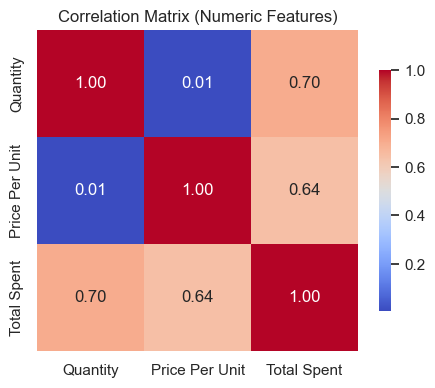

In [41]:
corr = data[["Quantity","Price Per Unit","Total Spent"]].corr()
plt.figure(figsize=(4.8,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .75})
plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.show()

## Correlation Insights
- As expected, Total Spent correlates strongly with both Quantity and Price Per Unit, confirming data integrity.
- The moderate correlation between Quantity and Price Per Unit may suggest that higher-priced items are often sold in smaller quantities, a typical trend in café menus where premium items have higher unit costs but lower volume.

---

<a id='dashboard'></a>

## EDA Dashboard


--- Café Sales KPI Summary ---
Total Revenue: $85,134.53
Average Order Value (AOV): $8.92
Average Items per Order: 3.02
Top-Selling Item: Salad ($16,576.77 total)
Most Common Payment Method: Unknown


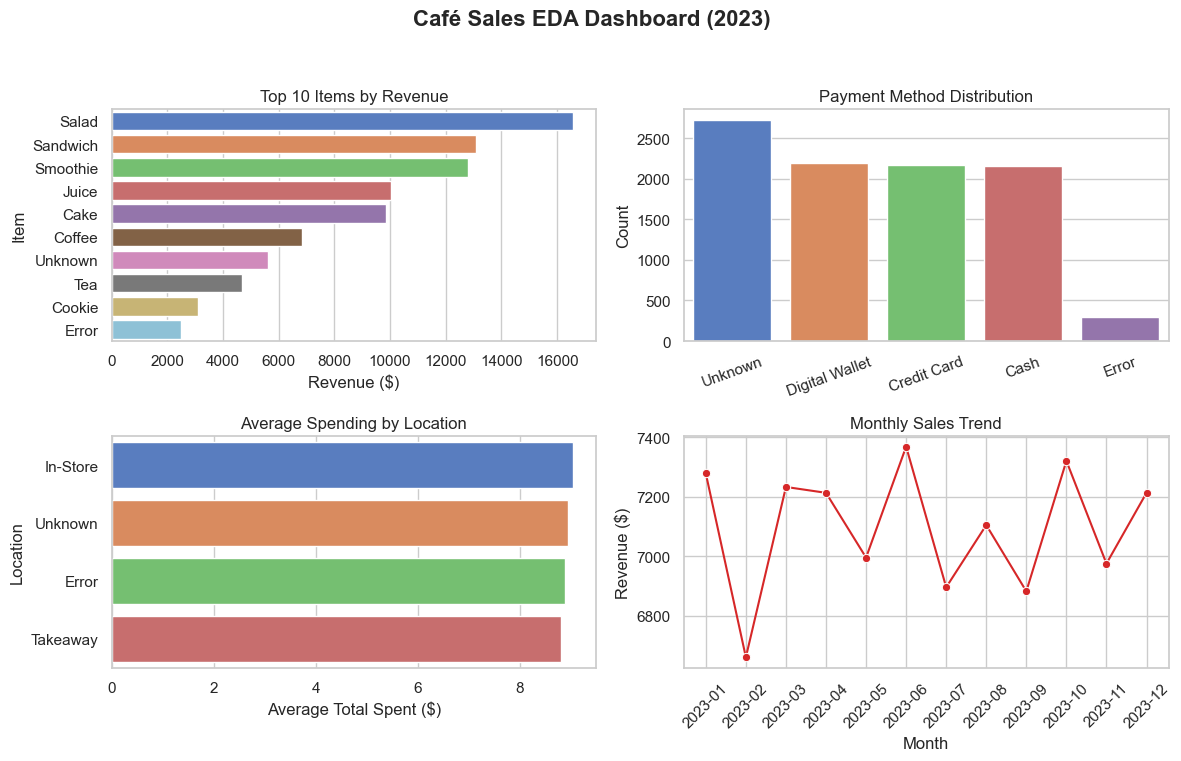

In [42]:
# Core KPIs
total_revenue = data["Total Spent"].sum()
aov = data["Total Spent"].mean()
avg_items = data["Quantity"].mean()
top_item_name = top_items_rev.iloc[0]["Item"]
top_item_revenue = top_items_rev.iloc[0]["Total Spent"]
most_common_payment = data["Payment Method"].mode()[0]

print("--- Café Sales KPI Summary ---")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value (AOV): ${aov:,.2f}")
print(f"Average Items per Order: {avg_items:.2f}")
print(f"Top-Selling Item: {top_item_name} (${top_item_revenue:,.2f} total)")
print(f"Most Common Payment Method: {most_common_payment}")

# 2x2 dashboard using already computed tables
fig, axes = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle("Café Sales EDA Dashboard (2023)", fontsize=16, fontweight="bold")

# Top Items by Revenue
sns.barplot(x="Total Spent", y="Item", data=top_items_rev, ax=axes[0,0])
axes[0,0].set_title("Top 10 Items by Revenue")
axes[0,0].set_xlabel("Revenue ($)")
axes[0,0].set_ylabel("Item")

# Payment Method Distribution
order_pm = data["Payment Method"].value_counts().index
sns.countplot(x="Payment Method", data=data, ax=axes[0,1], order=order_pm)
axes[0,1].set_title("Payment Method Distribution")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Count")
axes[0,1].tick_params(axis="x", rotation=20)

# Average spending by location
sns.barplot(x="Total Spent", y="Location", data=avg_spent_by_location, ax=axes[1,0])
axes[1,0].set_title("Average Spending by Location")
axes[1,0].set_xlabel("Average Total Spent ($)")
axes[1,0].set_ylabel("Location")

# Monthly sales trend
sns.lineplot(x="Month", y="Total Spent", data=monthly_sales, marker="o", ax=axes[1,1], color="tab:red")
axes[1,1].set_title("Monthly Sales Trend")
axes[1,1].set_xlabel("Month")
axes[1,1].set_ylabel("Revenue ($)")
axes[1,1].tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

<a id='kfsr'></a>

## Key Findings and Strategic Recommendations


### Key Findings
- **Data Completeness:** Approximately one-quarter of transactions include “Unknown” or “Error” entries in categorical fields, primarily Payment Method and Location.
  These were standardized during cleaning and preserved for transparency; however, they reflect operational recording gaps that may affect downstream modeling precision.
- **Product Performance:** Sandwiches, Smoothies, and Coffee dominate both frequency and total revenue, driving the café’s core profitability.
- **Customer Behavior:** Digital Wallet and Credit Card users consistently show higher average order values than cash users, reflecting a digitally engaged customer base.
- **Operational Trends:** Takeaway purchases yield higher average spend per transaction, suggesting that off-premise orders are often larger or multi-item.
- **Seasonal Patterns:** Revenue remains steady throughout the year, with mild peaks during late spring and early winter, indicating low seasonal volatility.
- **Sales Consistency:** Daily and monthly patterns confirm a balanced business model with consistent weekday performance and moderate weekend uplift.
- **Data Integrity:** Correlations among Quantity, Price, and Total Spent confirm the reliability of financial records after cleaning.

### Strategic Recommendations*
- **Menu & Promotion Optimization:**  
  Bundle top-performing items (e.g., Sandwich + Coffee or Smoothie + Snack) to raise average ticket size and cross-sell margins.

- **Customer Engagement:**  
  Launch loyalty or digital rewards programs targeting frequent credit card and wallet users to encourage repeat purchases and gather behavioral data.

- **Operational Planning:**  
  Align staffing and ingredient procurement with weekday/weekend sales rhythms to optimize labor and minimize waste.

- **Product Portfolio Review:**  
  Reassess low-performing items for potential rebranding, recipe adjustment, or removal to streamline the menu and focus on high-margin products.

- **Digital Payment Incentives:**  
  Offer small discounts or exclusive perks for cashless transactions to reinforce digital payment adoption and reduce transaction handling time.

- **Future Analysis Opportunities:**  
  Incorporate customer segmentation (if identifiers become available) and explore time-of-day sales analysis to support targeted pricing and scheduling decisions.  

<p style="font-size:12px;">
*This analysis is for demonstration purposes only and should not be construed as financial or business advice.<br>
(In other words: NFA — Not Financial Advice.)
</p>

---